In [1]:
# Pandas and Numpy libraries
import pandas as pd
import numpy as np
# For preprocessing the data
from sklearn import preprocessing
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
# To calculate the accuracy score of the model
from sklearn import metrics
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings 
warnings.filterwarnings( "ignore")

# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier



###  Loading the Data

In [2]:
df = pd.read_csv('Transport.csv')

**Data Dictionary :**
1. Age - Age of the Employee in Years
2. Gender - Gender of the Employee
3. Engineer - For Engineer = 1, Non Engineer = 0
4. MBA - For MBA = 1, Non MBA = 0
5. Work Exp - Experience In Years
6. Salary - Salary in Lakhs per annum
7. Distance - Distance in kms from Home to Office
8. license - If Employees has Driving license = 1, If not, then 0 
9. Transport - Mode of Transport(Target Variable)

In [3]:
df.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,Male,0,0,4,14.3,3.2,0,Public Transport
1,23,Female,1,0,4,8.3,3.3,0,Public Transport
2,29,Male,1,0,7,13.4,4.1,0,Public Transport
3,28,Female,1,1,5,13.4,4.5,0,Public Transport
4,27,Male,1,0,4,13.4,4.6,0,Public Transport


In [4]:
df.tail()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
439,40,Male,1,0,20,57.0,21.4,1,Private Transport
440,38,Male,1,0,19,44.0,21.5,1,Private Transport
441,37,Male,1,0,19,45.0,21.5,1,Private Transport
442,37,Male,0,0,19,47.0,22.8,1,Private Transport
443,39,Male,1,1,21,50.0,23.4,1,Private Transport


#### Data Type of data features

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    object 
 2   Engineer   444 non-null    int64  
 3   MBA        444 non-null    int64  
 4   Work Exp   444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   license    444 non-null    int64  
 8   Transport  444 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 31.3+ KB


- There were 5 integer variables, 2 float variables and 2 object variables.
- Transport variables was the target variable as per the question.
- As per the info function, we inferred that there were no null values present in the data set.

In [6]:
# Target Variable = Transport
# Rest are independant variables.

### Checking For Null Values

In [7]:
df.isnull().sum()

Age          0
Gender       0
Engineer     0
MBA          0
Work Exp     0
Salary       0
Distance     0
license      0
Transport    0
dtype: int64

### Data Shape

In [8]:
# Shape of the dataframe
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  444 
no. of columns:  9


#### Making different list for categorical columns and numerical columns

In [9]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

    

['Gender', 'Transport']
['Age', 'Engineer', 'MBA', 'Work Exp', 'Salary', 'Distance', 'license']


#### Checking for Anomilies(Bad Data)

In [10]:
for variable in cat:
    print(variable,":", sum(df[variable] == '?'))

Gender : 0
Transport : 0


In [11]:
for variable in num:
    print(variable,":", sum(df[variable] == '?'))

Age : 0
Engineer : 0
MBA : 0
Work Exp : 0
Salary : 0
Distance : 0
license : 0


**Interpretations :**
- Hence as per the above code, there were no anomilies/ '?' present in the data set.

### Data Preprocessing

#### Descriptive Statistics

In [12]:
# For Numerical Data
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,444.0,27.747748,4.416710,18.0,25.0,27.0,30.000,43.0
Engineer,444.0,0.754505,0.430866,0.0,1.0,1.0,1.000,1.0
MBA,444.0,0.252252,0.434795,0.0,0.0,0.0,1.000,1.0
Work Exp,444.0,6.299550,5.112098,0.0,3.0,5.0,8.000,24.0
Salary,444.0,16.238739,10.453851,6.5,9.8,13.6,15.725,57.0
Distance,444.0,11.323198,3.606149,3.2,8.8,11.0,13.425,23.4
license,444.0,0.234234,0.423997,0.0,0.0,0.0,0.000,1.0


In [13]:
# For Categorical Data
df[cat].describe().T

,count,unique,top,freq
Gender,444,2,Male,316
Transport,444,2,Public Transport,300


#### Check for Duplicate Data

In [14]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport


**Interpretations :**
- Hence, there were no duplicates present in the dataest.

In [15]:
df.columns = df.columns.str.replace(' ','_')

### Unique Values for Categorical Variables

In [16]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

GENDER :  2
Female    128
Male      316
Name: Gender, dtype: int64


TRANSPORT :  2
Private Transport    144
Public Transport     300
Name: Transport, dtype: int64




#### Converting Target Variable (Transport) into categorical variable

In [17]:
df['Transport'] = df.Transport.astype('category')

#### Transforming Data

In [18]:
df["Gender"]=df["Gender"].replace({"Male":0,"Female":1})

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Age        444 non-null    int64   
 1   Gender     444 non-null    int64   
 2   Engineer   444 non-null    int64   
 3   MBA        444 non-null    int64   
 4   Work_Exp   444 non-null    int64   
 5   Salary     444 non-null    float64 
 6   Distance   444 non-null    float64 
 7   license    444 non-null    int64   
 8   Transport  444 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 28.4 KB


**Conclusion :**
- Hence, the target variable 'Transport' had been converted to categorical variable.
- Also, the Independent variable 'Gender' had been converted to integer format(ordinal format) using astype function.

### EDA

#### Univariate Analysis

In [119]:
df.skew()

Age          0.955276
Gender       0.937952
Engineer    -1.186708
MBA          1.144763
Work_Exp     1.352840
Salary       2.044533
Distance     0.539851
license      1.259293
Transport   -0.753102
dtype: float64

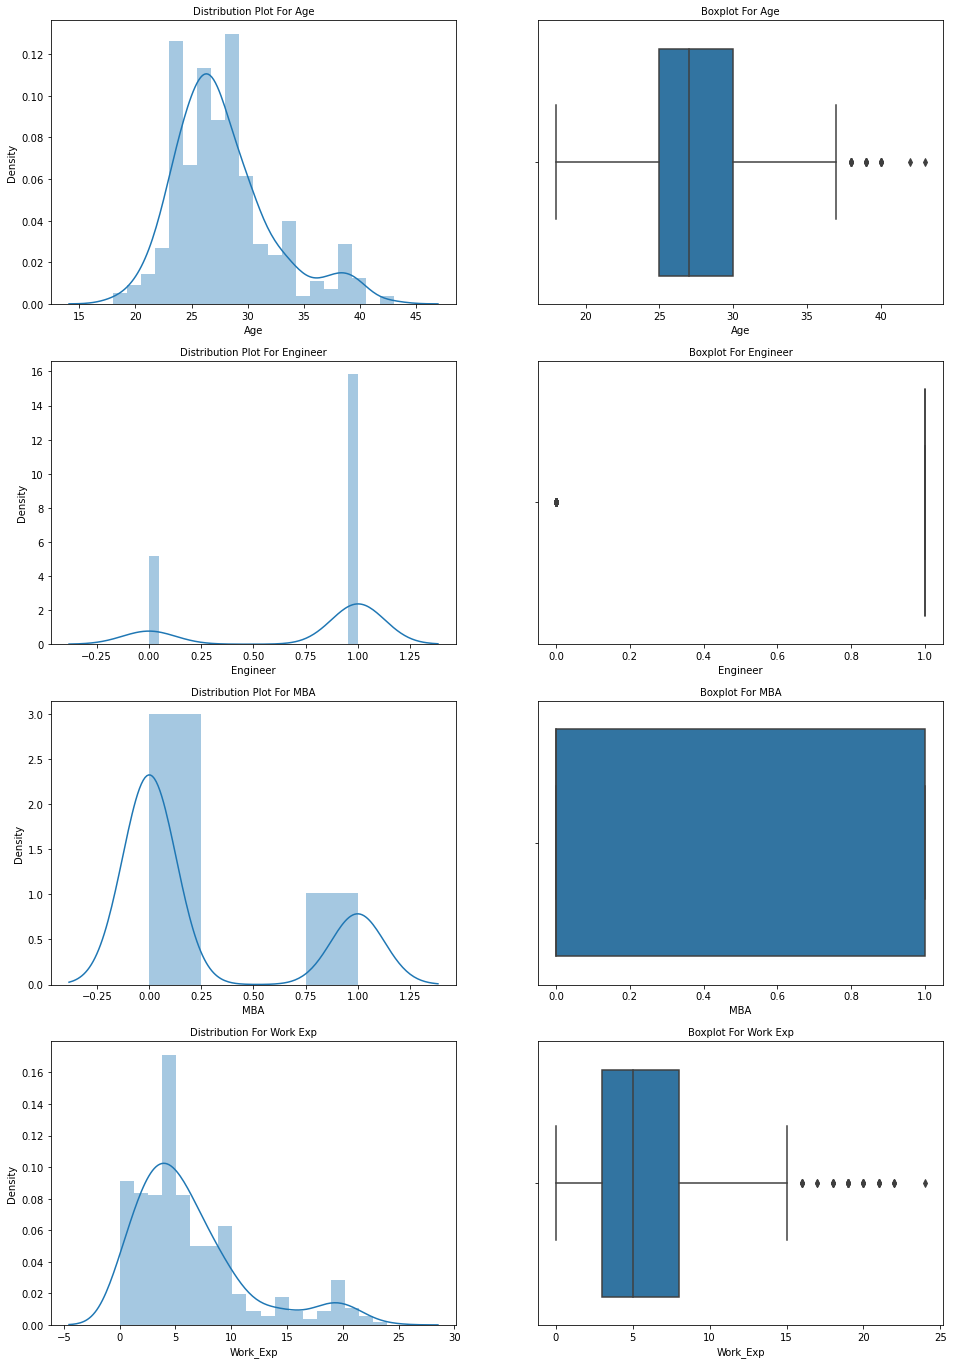

In [20]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(16,24)
a = sns.distplot(df['Age'] , ax=axes[0][0])
a.set_title("Distribution Plot For Age",fontsize=10)

a = sns.boxplot(df['Age'] , orient = "v" , ax=axes[0][1])
a.set_title("Boxplot For Age",fontsize=10)

a = sns.distplot(df['Engineer'] , ax=axes[1][0])
a.set_title("Distribution Plot For Engineer",fontsize=10)

a = sns.boxplot(df['Engineer'] , orient = "v" , ax=axes[1][1])
a.set_title("Boxplot For Engineer",fontsize=10)


a = sns.distplot(df['MBA'] , ax=axes[2][0])
a.set_title("Distribution Plot For MBA",fontsize=10)

a = sns.boxplot(df['MBA'] , orient = "v" , ax=axes[2][1])
a.set_title("Boxplot For MBA",fontsize=10)


a = sns.distplot(df['Work_Exp'] , ax=axes[3][0])
a.set_title("Distribution For Work Exp",fontsize=10)

a = sns.boxplot(df['Work_Exp'] , orient = "v" , ax=axes[3][1])
a.set_title("Boxplot For Work Exp",fontsize=10)

plt.show()

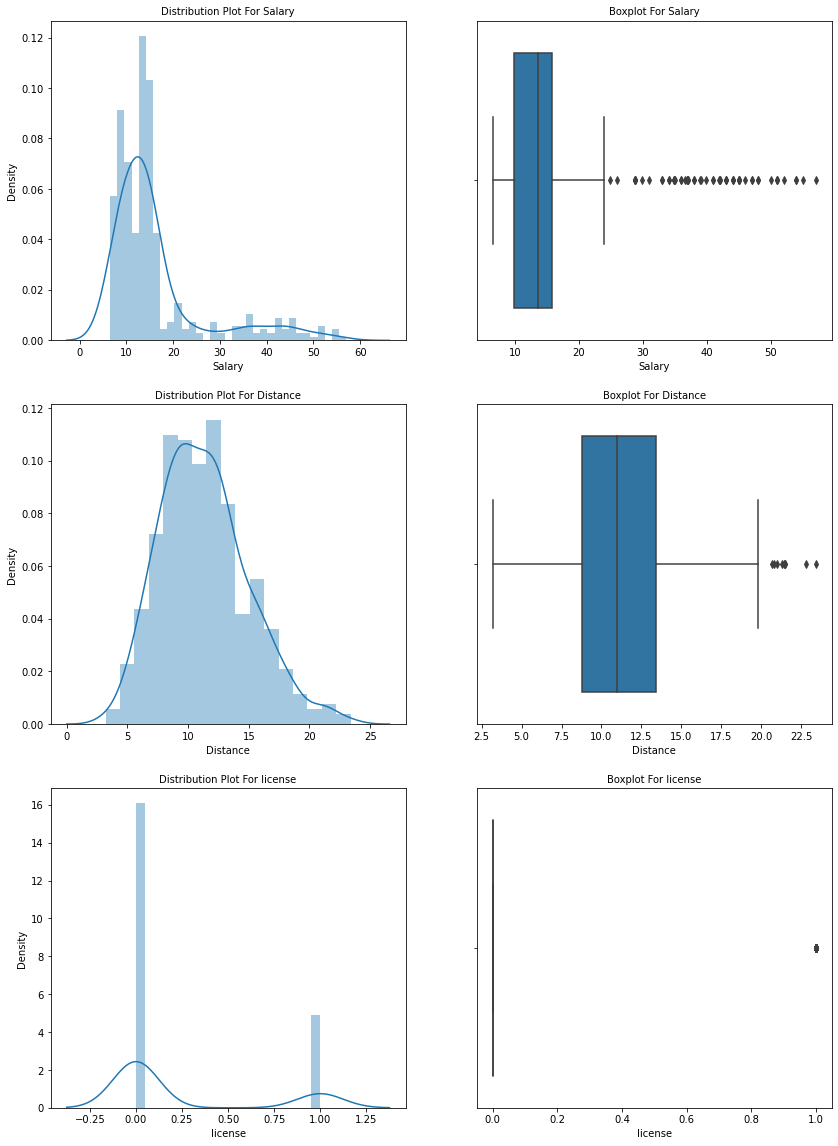

In [21]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(14,20)
a = sns.distplot(df['Salary'] , ax=axes[0][0])
a.set_title("Distribution Plot For Salary",fontsize=10)

a = sns.boxplot(df['Salary'] , orient = "v" , ax=axes[0][1])
a.set_title("Boxplot For Salary",fontsize=10)

a = sns.distplot(df['Distance'] , ax=axes[1][0])
a.set_title("Distribution Plot For Distance",fontsize=10)

a = sns.boxplot(df['Distance'] , orient = "v" , ax=axes[1][1])
a.set_title("Boxplot For Distance",fontsize=10)


a = sns.distplot(df['license'] , ax=axes[2][0])
a.set_title("Distribution Plot For license",fontsize=10)

a = sns.boxplot(df['license'] , orient = "v" , ax=axes[2][1])
a.set_title("Boxplot For license",fontsize=10)

plt.show()


### Bivariate and Multivariate Analysis

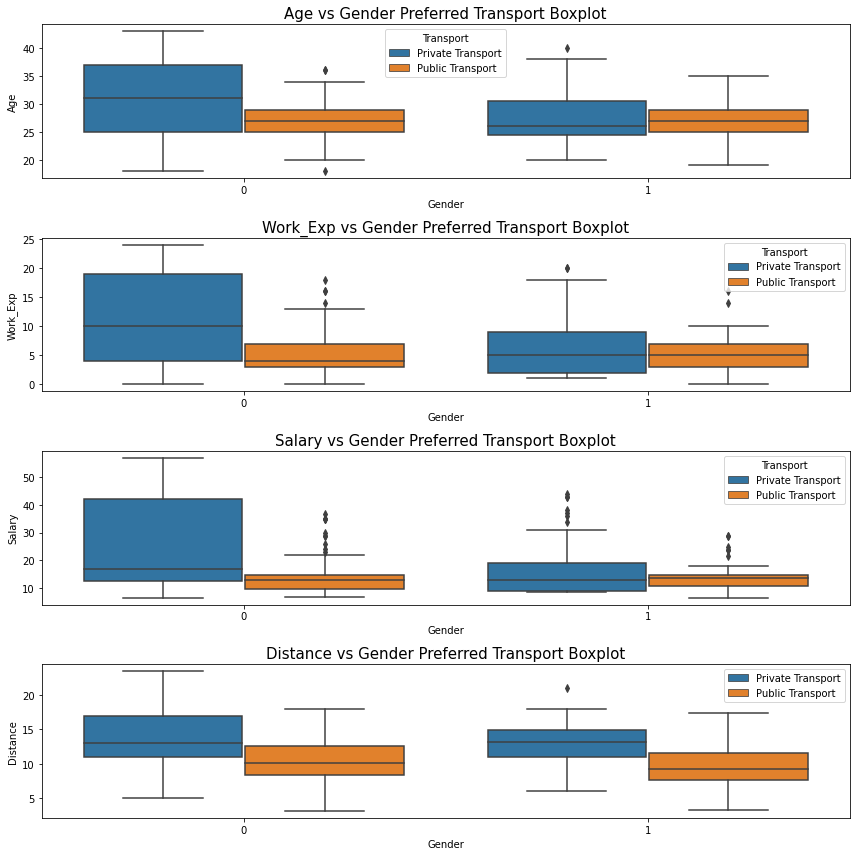

In [22]:
fig, axes = plt.subplots(nrows=4)
fig.set_size_inches(12, 12)

a = sns.boxplot(data = df, x = 'Gender', y = 'Age', hue='Transport',ax=axes[0])
a.set_title("Age vs Gender Preferred Transport Boxplot",fontsize=15)

a = sns.boxplot(data = df, x = 'Gender', y = 'Work_Exp', hue='Transport',ax=axes[1])
a.set_title("Work_Exp vs Gender Preferred Transport Boxplot",fontsize=15)

a = sns.boxplot(data = df, x = 'Gender', y = 'Salary', hue='Transport',ax=axes[2])
a.set_title("Salary vs Gender Preferred Transport Boxplot",fontsize=15)

a = sns.boxplot(data = df, x = 'Gender', y = 'Distance', hue='Transport',ax=axes[3])
a.set_title("Distance vs Gender Preferred Transport Boxplot",fontsize=15)

plt.legend(loc='best')
plt.tight_layout()
plt.show()

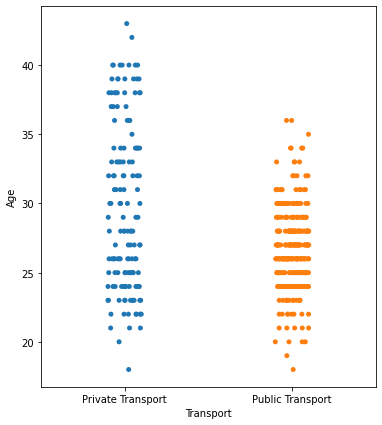

In [23]:
plt.figure(figsize=(6,7))
sns.stripplot(df["Transport"], df['Age'], jitter=True)
plt.show()

**Interpretation :**
- This tells us that Employees with age greater than 35 tends to use Private Transport.
- Moreover, it also tells us that, young Employees(Age < 35) prefers to use public transport as a mode of vehicle.

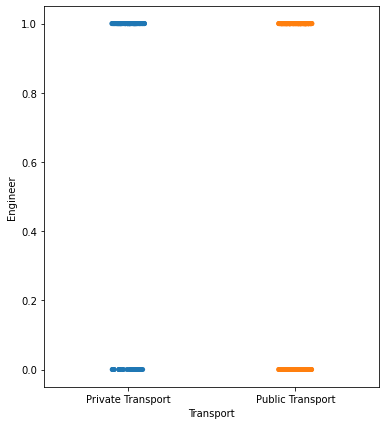

In [24]:
plt.figure(figsize=(6,7))
sns.stripplot(df["Transport"], df['Engineer'], jitter=True) 
plt.show()

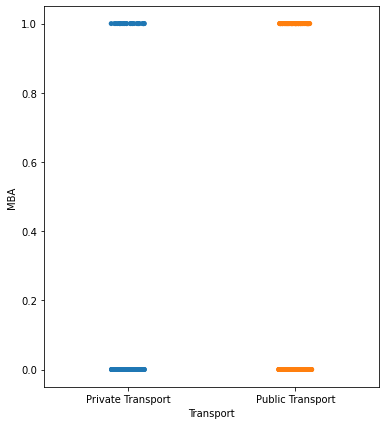

In [25]:
plt.figure(figsize=(6,7))
sns.stripplot(df["Transport"], df['MBA'], jitter=True) 
plt.show()

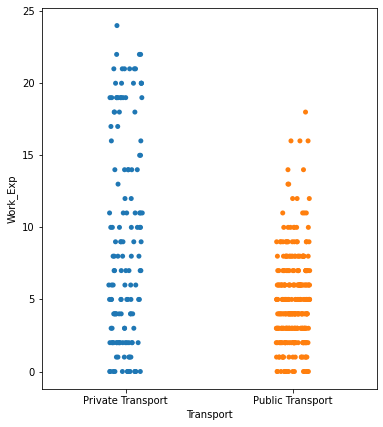

In [26]:
plt.figure(figsize=(6,7))
sns.stripplot(df["Transport"], df['Work_Exp'], jitter=True) 
plt.show()

**Interpretations :**
- It is inferred that Employees with work experience greater than 15 years tends to use Private Transport more as compared to Employees with work experience less than 15 years.
- Moreover, Employees with work experience less than 15 years tends to use Public Transport more.

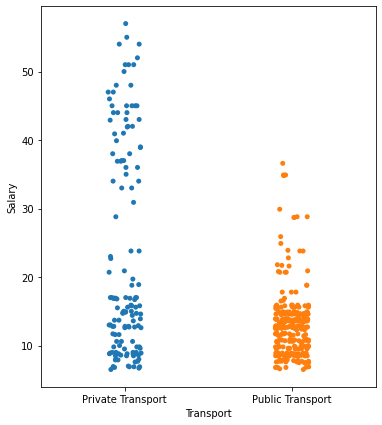

In [27]:
plt.figure(figsize=(6,7))
sns.stripplot(df["Transport"], df['Salary'], jitter=True) 
plt.show()

**Interpretations :**
- We inferred that Employees with salary higher than 30 Lakhs per annum use Private Transport .

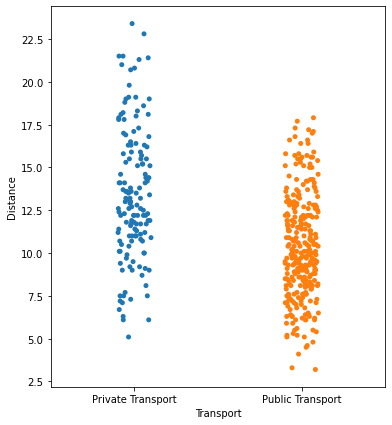

In [28]:
plt.figure(figsize=(6,7))
sns.stripplot(df["Transport"], df['Distance'], jitter=True) 
plt.show()

**Interpretations :**
- We noticed that when longer distance needed to be travelled then Employees took Private Transport. Moreover, the number of  employees with private transport were less as compared to number of employees using public transport.
- While , a majority of Employees tends to use Public transport when the distance travelled was 17.5 or below .

### Correlation Matrix

In [29]:
corr = df.corr(method ='pearson')
corr.round(3)

,Age,Gender,Engineer,MBA,Work_Exp,Salary,Distance,license
Age,1.000,-0.099,0.092,-0.029,0.932,0.861,0.353,0.452
Gender,-0.099,1.000,-0.018,-0.095,-0.086,-0.096,-0.054,-0.235
Engineer,0.092,-0.018,1.000,0.066,0.086,0.087,0.059,0.019
MBA,-0.029,-0.095,0.066,1.000,0.009,-0.007,0.036,-0.027
Work_Exp,0.932,-0.086,0.086,0.009,1.000,0.932,0.373,0.453
Salary,0.861,-0.096,0.087,-0.007,0.932,1.000,0.442,0.508
Distance,0.353,-0.054,0.059,0.036,0.373,0.442,1.000,0.290
license,0.452,-0.235,0.019,-0.027,0.453,0.508,0.290,1.000


**Interpretations :**
- 'Work Exp' and 'Age' had highest correlation between them which is generally obvious as more the age , experience also increases for a working person. Also, 'Work Exp' and 'Salary' had the equal correlation value which indicated that more the work experience , the more the salary of an Employee.
- Just after that, 'Salary' & 'Age' has second highest correlation between them which meant that age is quite a big factor for salary of an Employee.
- Other than these mostly rest of the variables don't have that much of correlation value as per the plot.

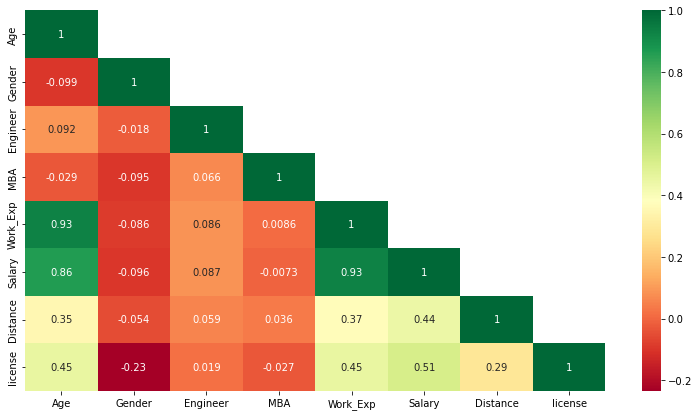

In [30]:
plt.figure(figsize=(13,7))

sns.heatmap(corr,annot=True,mask=np.triu(corr,+1),cmap='RdYlGn');

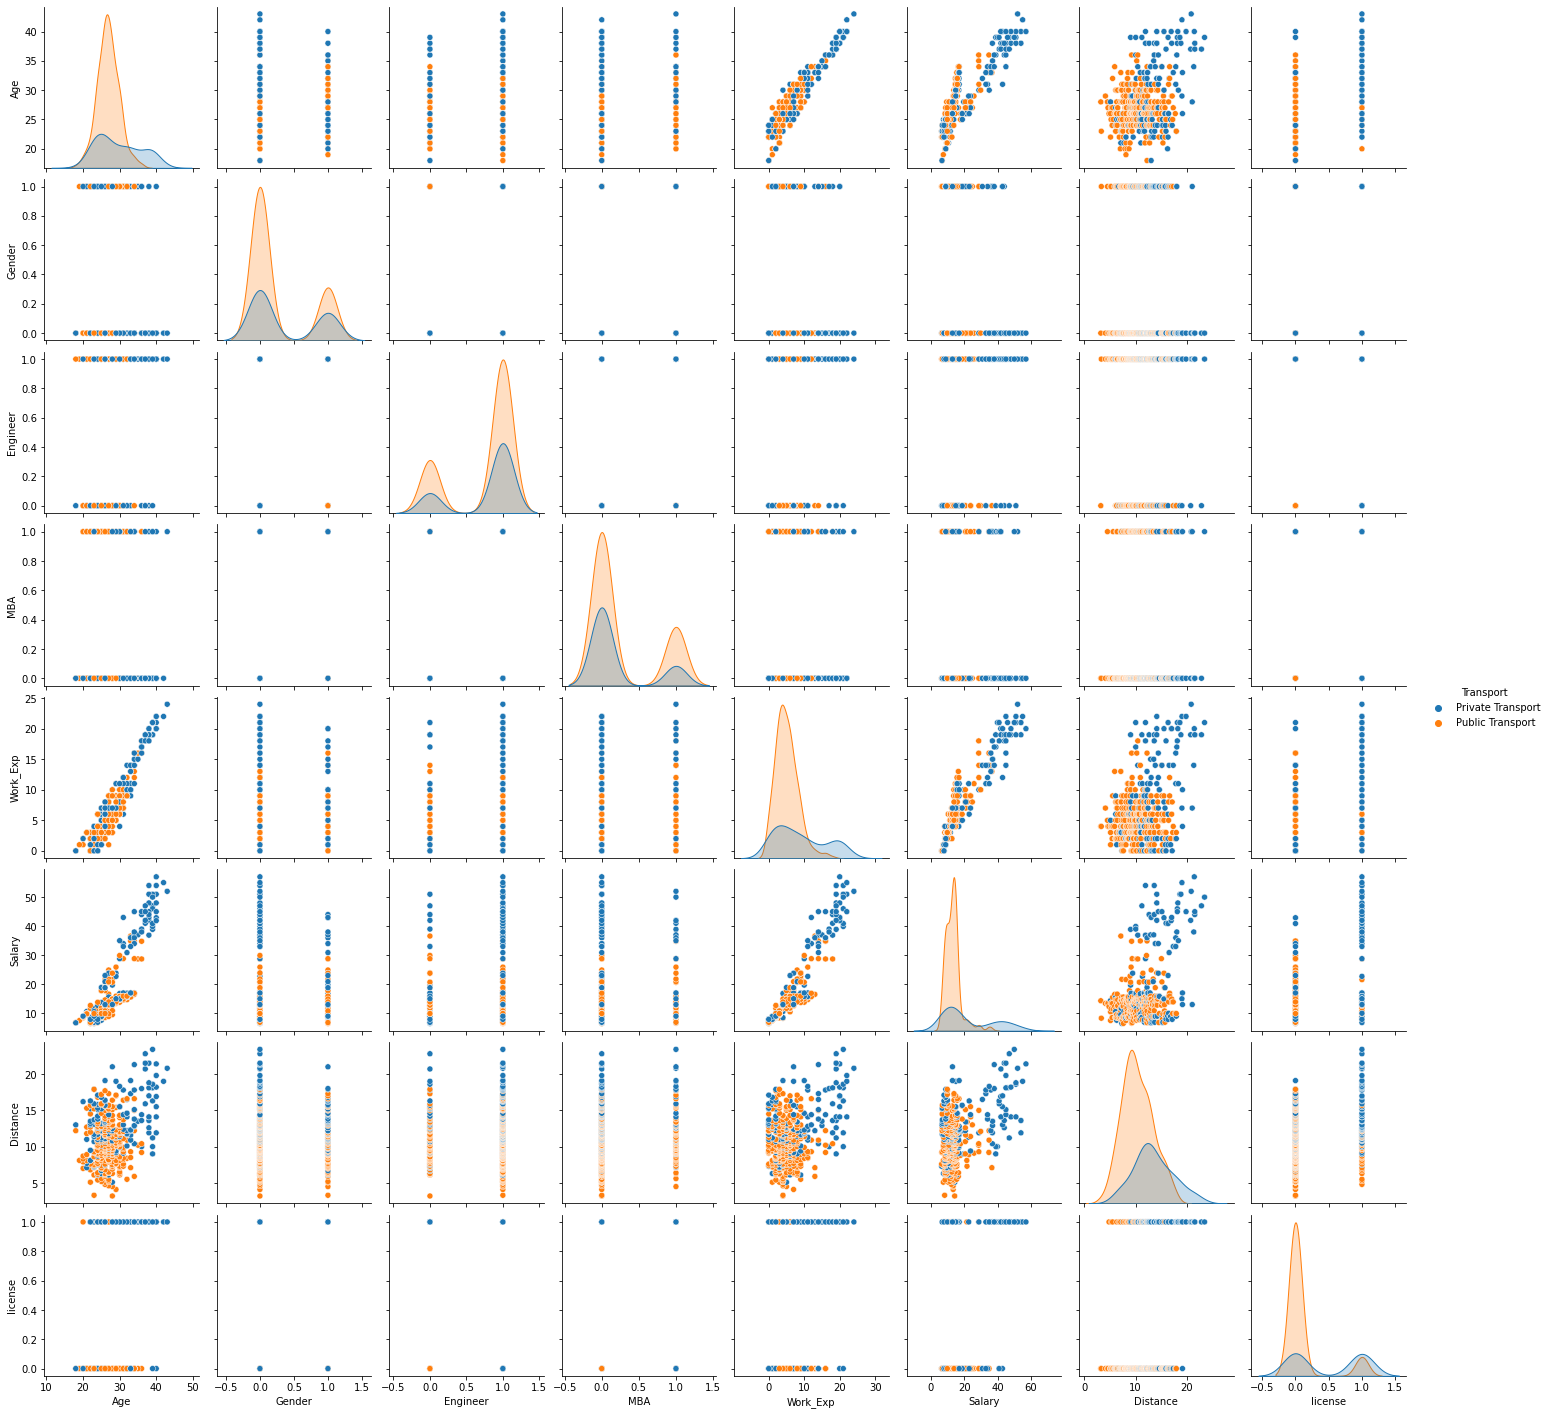

In [31]:
sns.pairplot(df,hue="Transport")

In [32]:
df.var()

Age          19.507331
Gender        0.205641
Engineer      0.185646
MBA           0.189047
Work_Exp     26.133544
Salary      109.283011
Distance     13.004314
license       0.179773
dtype: float64

**Interpretations :**
- By looking at the variances of the following columns, Engineer, MBA and license had almost zero variance meaning that they will have zero influence on the classification model.
- We also inferred that Salary had the highest variance followed by Work Exp so it means that they both will a large variance on the model.

### Outliers Check

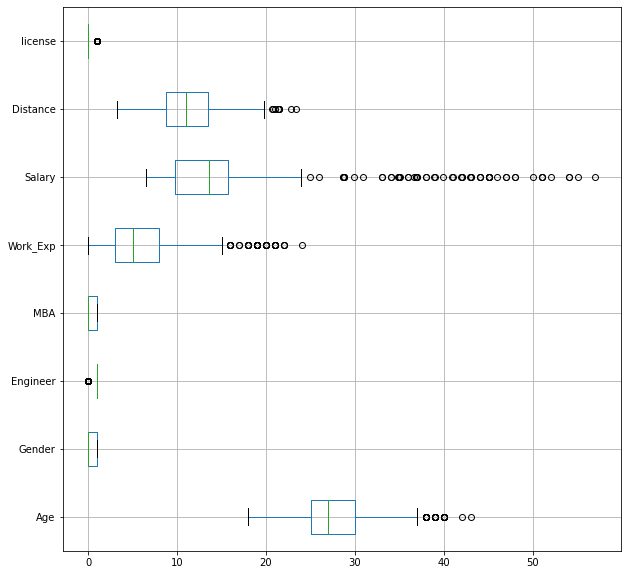

In [33]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
df.boxplot(vert=0)
plt.show()

**Interpretations :**
- There were no extreme values present in all the variables except for MBA and Gender.
- Maximum number of extreme values were present in the Salary variable but these were not considered as outliers because Salary is based on the 'Work Exp' and 'Age' as shown by the correlation plot.
- 'Engineer' column represent some extreme value but actually it cannot be considered as an outlier as this variable represents the which Employee was Engineer or not.

**Conclusion** 
- We noted that only extreme values were present in the dataset. And those values were not considered as Outliers.
- As inferred from the boxplot, there were no outliers present in the dataset.
- So, no treatment of outliers was required in the dataset.

#### Is Scaling Necessary ?

- __Yes__, __Scaling__ is necessary for KNN. <br>
- __Scaling__ is a necessity when using Distance-based models such as KNN etc. Scaling can be done on continuous and ordinal variables. <br>
- It is because, if the scale of features is very different then normalization is required. This is because the distance calculation done in KNN uses feature values. When the one feature values are large than other, that feature will dominate the distance hence the outcome of the KNN.

### Encode The Data

The 'Transport' variable was converted from 'object' type to 'categorical' type. <br>
'Gender' variable has been transformed earlier but still we did encoding.
Hence, it is okay to build our model.

In [34]:
## Defining a Label Encoder object instance
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [35]:
## Applying the created Label Encoder object for the target class
## Assigning the Transport 'Private Transport' as '0' and 'Public Transport' as '1'

df['Transport'] = LE.fit_transform(df['Transport'])
df.head()

,Age,Gender,Engineer,MBA,Work_Exp,Salary,Distance,license,Transport
0,28,0,0,0,4,14.3,3.2,0,1
1,23,1,1,0,4,8.3,3.3,0,1
2,29,0,1,0,7,13.4,4.1,0,1
3,28,1,1,1,5,13.4,4.5,0,1
4,27,0,1,0,4,13.4,4.6,0,1


In [36]:
df.shape

(444, 9)

### Logistic Regression

We need to apply logistic regression model as per the question.

In [37]:
df.columns

Index(['Age', 'Gender', 'Engineer', 'MBA', 'Work_Exp', 'Salary', 'Distance',
       'license', 'Transport'],
      dtype='object')

#### Base Model 

In [38]:
formula_1 = 'Transport ~ Age + Gender + Engineer + MBA + Work_Exp + Salary + Distance + license'

In [39]:
import statsmodels.formula.api as sm
from sklearn.linear_model import LogisticRegression # for logistic regression
Logistic_1 = sm.logit(formula=formula_1,data=df).fit()

Optimization terminated successfully.
         Current function value: 0.437944
         Iterations 7


In [40]:
Logistic_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Transport   No. Observations:                  444
Model:                          Logit   Df Residuals:                      435
Method:                           MLE   Df Model:                            8
Date:                Thu, 18 Aug 2022   Pseudo R-squ.:                  0.3049
Time:                        01:15:34   Log-Likelihood:                -194.45
converged:                       True   LL-Null:                       -279.76
Covariance Type:            nonrobust   LLR p-value:                 9.551e-33
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4470      1.791      0.250      0.803      -3.063       3.957
Age            0.2083      0.077      2.706      0.007       0.057       0.359
Gender        -1.2810      0.288     -4.441      0.000      -1.846      -0.716
Engineer      -0.1543      0.296     -0.521      0.603      -0.735       0.427
MBA            0.5601      0.314      1.782      0.075      -0.056       1.176
Work_Exp      -0.1005      0.100     -1.001      0.317      -0.297       0.096
Salary        -0.0805      0.040     -2.003      0.045      -0.159      -0.002
Distance      -0.2248      0.043     -5.290      0.000      -0.308      -0.142
license       -2.0463      0.334     -6.135      0.000      -2.700      -1.393
==============================================================================
"""

#### Check for multicollinearity in the predictor variables using Variance Inflation Factor (VIF).

In [41]:
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [42]:
vif_cal(input_data=df.drop('Transport',axis=1))

Age  VIF =  7.89
Gender  VIF =  1.07
Engineer  VIF =  1.02
MBA  VIF =  1.03
Work_Exp  VIF =  15.74
Salary  VIF =  8.87
Distance  VIF =  1.28
license  VIF =  1.45


**Interpretations :**
- As per the logistic regression base model, we noticed that 'Engineer' & 'Work_Exp' had maximum p value but as we check for multicollinearity using variance inflation factor(VIF), we got to know that 'Work_Exp' & 'Salary' had highest VIF value.
- Our first priority to build a better model was by removing multicollinearity, so for that we decided to remove 'Work_Exp' variable and build another model as it had highest VIF among the rest.

#### 2nd Iteration Model

In [43]:
formula_2 ='Transport ~ Age + Gender + Engineer + MBA + Salary + Distance + license'

In [44]:
Logistic_2 = sm.logit(formula=formula_2,data=df).fit()

Optimization terminated successfully.
         Current function value: 0.439069
         Iterations 7


In [45]:
Logistic_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Transport   No. Observations:                  444
Model:                          Logit   Df Residuals:                      436
Method:                           MLE   Df Model:                            7
Date:                Thu, 18 Aug 2022   Pseudo R-squ.:                  0.3032
Time:                        01:15:34   Log-Likelihood:                -194.95
converged:                       True   LL-Null:                       -279.76
Covariance Type:            nonrobust   LLR p-value:                 3.014e-33
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6694      1.324      1.261      0.207      -0.925       4.264
Age            0.1561      0.057      2.749      0.006       0.045       0.267
Gender        -1.2805      0.287     -4.454      0.000      -1.844      -0.717
Engineer      -0.1459      0.295     -0.494      0.622      -0.725       0.433
MBA            0.5265      0.311      1.690      0.091      -0.084       1.137
Salary        -0.1107      0.028     -4.000      0.000      -0.165      -0.056
Distance      -0.2193      0.042     -5.222      0.000      -0.302      -0.137
license       -2.0088      0.330     -6.089      0.000      -2.655      -1.362
==============================================================================
"""

#### Check for multicollinearity using VIF

In [46]:
vif_cal(input_data = df.drop(['Transport','Work_Exp'],axis=1))

Age  VIF =  3.89
Gender  VIF =  1.07
Engineer  VIF =  1.02
MBA  VIF =  1.02
Salary  VIF =  4.46
Distance  VIF =  1.26
license  VIF =  1.43


**Interpretations :**
- As we removed 'Work_Exp' variable, there had been an improvement in model but still a lot of improvement/tuning can be done in the model.
- The p value for 'Engineer' was very high as compared to others so for a better regularised model, we must remove it.

#### 3rd Iteration Model

In [47]:
formula_3 ='Transport ~ Age + Gender + MBA + Salary + Distance + license'

In [48]:
Logistic_3 = sm.logit(formula=formula_3,data=df).fit()

Optimization terminated successfully.
         Current function value: 0.439346
         Iterations 7


In [49]:
Logistic_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Transport   No. Observations:                  444
Model:                          Logit   Df Residuals:                      437
Method:                           MLE   Df Model:                            6
Date:                Thu, 18 Aug 2022   Pseudo R-squ.:                  0.3027
Time:                        01:15:34   Log-Likelihood:                -195.07
converged:                       True   LL-Null:                       -279.76
Covariance Type:            nonrobust   LLR p-value:                 6.095e-34
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5954      1.315      1.214      0.225      -0.981       4.172
Age            0.1547      0.057      2.730      0.006       0.044       0.266
Gender        -1.2758      0.287     -4.446      0.000      -1.838      -0.713
MBA            0.5115      0.309      1.653      0.098      -0.095       1.118
Salary        -0.1105      0.028     -4.001      0.000      -0.165      -0.056
Distance      -0.2192      0.042     -5.217      0.000      -0.302      -0.137
license       -2.0004      0.329     -6.077      0.000      -2.646      -1.355
==============================================================================
"""

#### Check for multicollinearity using VIF

In [50]:
vif_cal(input_data = df.drop(['Transport','Work_Exp','Engineer'],axis=1))

Age  VIF =  3.89
Gender  VIF =  1.07
MBA  VIF =  1.02
Salary  VIF =  4.46
Distance  VIF =  1.26
license  VIF =  1.43


**Interpretation :**
- The p value for everyone is now less than 0.05 as per the significance value. 
- But asa we checked VIF value for this 3rd Iteration model, we noticed that the VIF value for 'Salary' and 'Age' were high.
- So, we needed to remove 'Age' as it had high VIF and also it was not a big factor as per the correlation with Transport.

#### 4th Iteration Model

In [51]:
formula_4 ='Transport ~ Gender + MBA + Salary + Distance + license'

In [52]:
Logistic_4 = sm.logit(formula=formula_4,data=df).fit()

Optimization terminated successfully.
         Current function value: 0.447997
         Iterations 6


In [53]:
Logistic_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Transport   No. Observations:                  444
Model:                          Logit   Df Residuals:                      438
Method:                           MLE   Df Model:                            5
Date:                Thu, 18 Aug 2022   Pseudo R-squ.:                  0.2890
Time:                        01:15:35   Log-Likelihood:                -198.91
converged:                       True   LL-Null:                       -279.76
Covariance Type:            nonrobust   LLR p-value:                 4.308e-33
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9342      0.555      8.892      0.000       3.847       6.022
Gender        -1.2804      0.284     -4.507      0.000      -1.837      -0.724
MBA            0.4560      0.306      1.488      0.137      -0.145       1.057
Salary        -0.0515      0.016     -3.179      0.001      -0.083      -0.020
Distance      -0.2202      0.041     -5.317      0.000      -0.301      -0.139
license       -1.8981      0.324     -5.861      0.000      -2.533      -1.263
==============================================================================
"""

#### Check for multicollinearity using VIF

In [54]:
vif_cal(input_data = df.drop(['Transport','Work_Exp','Engineer','Age'],axis=1))

Gender  VIF =  1.07
MBA  VIF =  1.01
Salary  VIF =  1.55
Distance  VIF =  1.26
license  VIF =  1.43


**Interpretations :**
- We observed that as we removed 'Age' variable, the model become quite good . All VIF values for variables were within the range.
- The p value for only 'MBA' was greater than 0.05 , so we only need to remove it in order to make this model best model.

#### 5th Iteration Model

In [55]:
formula_5 ='Transport ~ Gender + Salary + Distance + license'

In [56]:
Logistic_5 = sm.logit(formula=formula_5,data=df).fit()

Optimization terminated successfully.
         Current function value: 0.450574
         Iterations 6


In [57]:
Logistic_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Transport   No. Observations:                  444
Model:                          Logit   Df Residuals:                      439
Method:                           MLE   Df Model:                            4
Date:                Thu, 18 Aug 2022   Pseudo R-squ.:                  0.2849
Time:                        01:15:35   Log-Likelihood:                -200.05
converged:                       True   LL-Null:                       -279.76
Covariance Type:            nonrobust   LLR p-value:                 1.960e-33
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0360      0.555      9.080      0.000       3.949       6.123
Gender        -1.3261      0.283     -4.690      0.000      -1.880      -0.772
Salary        -0.0501      0.016     -3.149      0.002      -0.081      -0.019
Distance      -0.2199      0.042     -5.288      0.000      -0.301      -0.138
license       -1.9231      0.323     -5.945      0.000      -2.557      -1.289
==============================================================================
"""

#### Check For Multicollinearity using VIF

In [58]:
vif_cal(input_data = df.drop(['Transport','Work_Exp','Engineer','Age','MBA'],axis=1))

Gender  VIF =  1.06
Salary  VIF =  1.55
Distance  VIF =  1.25
license  VIF =  1.42


**Interpretations :**
- Now, every variable were having p value less than 0.05 and the VIF value for every variable were good enough and in the range also.

**Conclusion :**
- As per the insights and making appropriate changes into the model, the __5th Iteration model__ was considered to be the __Best Model__ from all the models.
- The p value, VIF value and factors of all the attributes were appropriate and this model looks pretty good model.

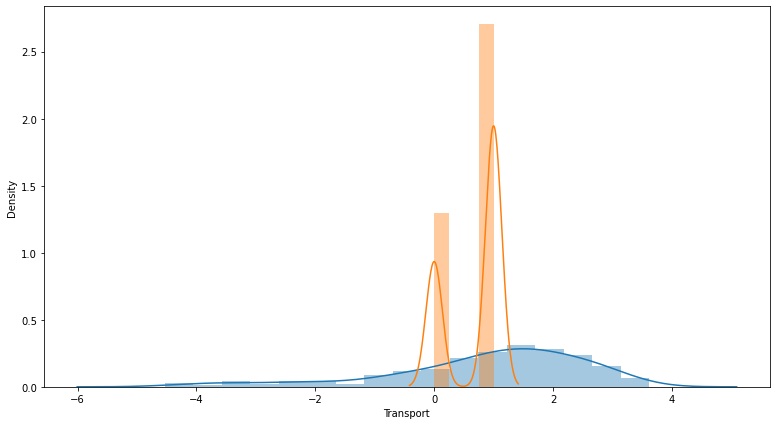

In [59]:
plt.figure(figsize=(13,7))

sns.distplot(Logistic_5.fittedvalues)
sns.distplot(df['Transport']);

In [60]:
LR = LogisticRegression(solver='newton-cg', penalty='none')

#### Train-Test Split Split X and y into training and test set in 70:30 ratio with random_state = 1 as required by the question

In [61]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
Train,Test = train_test_split(df, test_size=0.3, random_state=1, stratify=df['Transport']) 

In [62]:
round(Train['Transport'].value_counts(1)*100)

1    67.0
0    33.0
Name: Transport, dtype: float64

In [63]:
round(Test['Transport'].value_counts(1)*100)

1    68.0
0    32.0
Name: Transport, dtype: float64

In [64]:
model_final = LR.fit(Train[['Gender', 'Salary','Distance', 'license']], Train['Transport'])

In [65]:
model_final_test_class = model_final.predict(Test[['Gender','Salary', 'Distance', 'license']])
model_final_test_probabilities = model_final.predict_proba(Test[['Gender', 'Salary','Distance', 'license']])

#### Comparing Accuracy on Train & Test Data

In [66]:
print('Train Accuracy Score of the Final Model:', round(model_final.score(Train[['Gender','Salary', 'Distance', 'license']], Train['Transport'])*100),'%')
print('Test Accuracy Score of the Final Model:', round(model_final.score(Test[['Gender','Salary', 'Distance', 'license']], Test['Transport'])*100),'%')

Train Accuracy Score of the Final Model: 83 %
Test Accuracy Score of the Final Model: 82 %


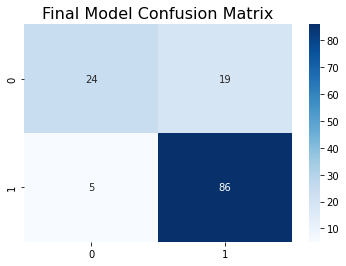

In [67]:
sns.heatmap((metrics.confusion_matrix(Test['Transport'], model_final_test_class)), annot=True, fmt='.5g', cmap='Blues');
plt.title('Final Model Confusion Matrix', fontsize=16);

In [68]:
print('\033[1mFinal Model\033[0m')
tn, fp, fn, tp = metrics.confusion_matrix(Test['Transport'], model_final_test_class).ravel()
print('True Negatives:', tn, '\n''False Positives:' , fp, '\n''False Negatives:', fn, '\n''True Positives:', tp)

Final Model
True Negatives: 24 
False Positives: 19 
False Negatives: 5 
True Positives: 86


In [69]:
print('\033[1mFinal Model Classification Report\033[0m')
print(metrics.classification_report(Test['Transport'], model_final_test_class))

Final Model Classification Report
              precision    recall  f1-score   support

           0       0.83      0.56      0.67        43
           1       0.82      0.95      0.88        91

    accuracy                           0.82       134
   macro avg       0.82      0.75      0.77       134
weighted avg       0.82      0.82      0.81       134



In [70]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,accuracy_score,confusion_matrix

log_reg_metrics = classification_report(Test['Transport'], model_final_test_class, output_dict=True)
log_reg = pd.DataFrame(log_reg_metrics).T
log_reg_f1 = round(log_reg.loc["1"][2],2)
log_reg_recall = round(log_reg.loc["1"][1],2)
log_reg_precision = round(log_reg.loc["1"][0],2)
log_reg_acc = round(log_reg.loc["accuracy"][0],2)

Final Model AUC-ROC: 0.76156


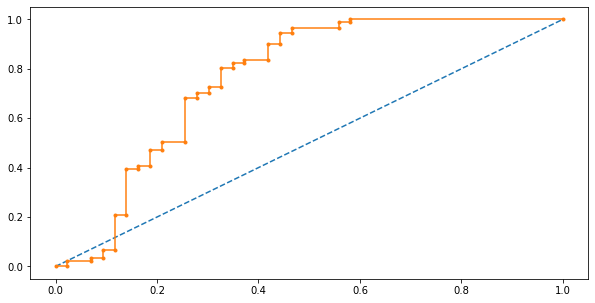

In [71]:
# AUC and ROC for the Final Model
plt.figure(figsize=(10,5))

# calculate AUC
log_reg_auc = metrics.roc_auc_score(Test['Transport'], model_final_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('\033[1mFinal Model AUC-ROC:\033[0m %.5f' % log_reg_auc)

# # calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Test['Transport'], model_final_test_probabilities[:, 1])#keeping only the probabilities for the desired 

#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

# show the plot
plt.show()


### Conclusion that 5th Iteration that is Best Model

#### Transport = (Gender x [ -1.3261 ]) + (Salary x [ -0.0501 ]) + (Distance x [ -0.2199 ]) + (license x [ -1.9231 ])

- The above equation represents the best predictors used in finding out the target variable which is 'Transport' in order to determine whether an employee opted Private Transport or Public Transport.
- AUC for target variable showed us that 76% area came under the curve which was good.
- As per the ROC curve, the curve was going to the other side at the beginning but as we proceededd further , the curve got to the correct side and a proper ROC curve was build up.
- After considering all the factors,predictors, plots & ROC curve, we came to a decisison that 5TH Iteration Model was the __Best Model__ .
- Hence, __5th Iteration Model__ was the __Best Model__.

### KNN Model

**Train-Test Split** Split X and y into training and test set in 70:30 ratio with random_state = 1 as required by the question

In [72]:
# Arrange data into independent variables and dependent variables
X = df.drop("Transport",axis=1)  ## Features
y = df["Transport"]  ## Target

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1, stratify=y)

In [74]:
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape[0])
print('y_test:',y_test.shape[0])

X_train: (310, 8)
X_test: (134, 8)
y_train: 310
y_test: 134


In [75]:
sc = StandardScaler()

In [76]:
X_train_sc = pd.DataFrame(sc.fit_transform(X_train), columns = X_train.columns)
X_test_sc = pd.DataFrame(sc.transform(X_test), columns = X_test.columns)

In [77]:
knn = KNeighborsClassifier()
knn.fit(X_train_sc, y_train)

KNeighborsClassifier()

In [78]:
Y_train_predict = knn.predict(X_train_sc)
Y_test_predict = knn.predict(X_test_sc)

In [79]:
print("Train Accuracy is: {}".format(round(accuracy_score(y_train, Y_train_predict)*100)),'%')
print("Test Accuracy is: {}".format(round(accuracy_score(y_test, Y_test_predict)*100)),'%')


print("Train ROC-AUC score is: {}".format(round(roc_auc_score(y_train,knn.predict_proba(X_train_sc)[:,1])*100)),'%')
print("Test ROC-AUC score is: {}".format(round(roc_auc_score(y_test,knn.predict_proba(X_test_sc)[:,1])*100)),'%')



print("\n\033[1mConfusion matrix for train set:\033[0m ","\n",confusion_matrix(y_train, Y_train_predict))
print("\n\033[1mConfusion matrix for test set:\033[0m ","\n",confusion_matrix(y_test, Y_test_predict))

Train Accuracy is: 86 %
Test Accuracy is: 81 %
Train ROC-AUC score is: 93 %
Test ROC-AUC score is: 84 %

Confusion matrix for train set:  
 [[ 65  36]
 [  6 203]]

Confusion matrix for test set:  
 [[22 21]
 [ 4 87]]


**Interpretations :**
- We inferred that the train adn test accuracy for the KNN Model were close to each other but the model could be further regularised using certain parameters.
- The confusion matrix of train set indicated that out of total training values 203 values provided were true positive meaning that were classified correctly and the 65 were also classified as true negative.
- As we see through the confusion matrix of test set, we inferred that out of total training values 87 were classified as true positive and 22 were classified as true negative.

In [80]:
print('Classification Report Train set')
print(classification_report(y_train, Y_train_predict))

Classification Report Train set
              precision    recall  f1-score   support

           0       0.92      0.64      0.76       101
           1       0.85      0.97      0.91       209

    accuracy                           0.86       310
   macro avg       0.88      0.81      0.83       310
weighted avg       0.87      0.86      0.86       310



In [81]:
print('Classification Report Test set')
print(classification_report(y_test, Y_test_predict))

Classification Report Test set
              precision    recall  f1-score   support

           0       0.85      0.51      0.64        43
           1       0.81      0.96      0.87        91

    accuracy                           0.81       134
   macro avg       0.83      0.73      0.76       134
weighted avg       0.82      0.81      0.80       134



**Interpretations :**
- From the classification report of train & test data, we inferred that f1 score for class '1'(Public Transport) were 91% & 87% which were good. But as we saw the f1 score for class '0'(Private Transport), the f1 score values 76% & 64% which were not that good.
- Thus in order to improve the model, hyper tuning must be done using the Grid Search CV which will help in building the best KNN model.

#### Scaling the dataset / Tuning  Usinf Grid Search CV

In [82]:
params = {'n_neighbors':list(range(1,30)),
          'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
          'leaf_size':list(range(1,30)),
          'p':[1,2],
          'metric':['euclidean', 'minkowski', 'manhattan']}

In [83]:
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid=params, cv=3, verbose =1 , refit=True)
grid_knn.fit(X_train_sc, y_train)

Fitting 3 folds for each of 20184 candidates, totalling 60552 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29],
                         'metric': ['euclidean', 'minkowski', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2]},
             verbose=1)

In [84]:
grid_knn.best_params_

{'algorithm': 'auto',
 'leaf_size': 1,
 'metric': 'minkowski',
 'n_neighbors': 12,
 'p': 1}

In [85]:
train_grid_predict = grid_knn.predict(X_train_sc)
test_grid_predict = grid_knn.predict(X_test_sc)

In [86]:
print("Train Accuracy is: {}".format(round(accuracy_score(y_train, train_grid_predict)*100)),'%')
print("Test Accuracy is: {}".format(round(accuracy_score(y_test, test_grid_predict)*100)),'%')


print("Train ROC-AUC score is: {}".format(round(roc_auc_score(y_train, grid_knn.predict_proba(X_train_sc)[:,1])*100)),'%')
print("Test ROC-AUC score is: {}".format(round(roc_auc_score(y_test, grid_knn.predict_proba(X_test_sc)[:,1])*100)),'%')



print("Confusion matrix for train set: ","\n",confusion_matrix(y_train, train_grid_predict))
print("Confusion matrix for test set: ","\n",confusion_matrix(y_test, test_grid_predict))

Train Accuracy is: 83 %
Test Accuracy is: 81 %
Train ROC-AUC score is: 89 %
Test ROC-AUC score is: 84 %
Confusion matrix for train set:  
 [[ 55  46]
 [  7 202]]
Confusion matrix for test set:  
 [[21 22]
 [ 3 88]]


**Interpretations :**
- We inferred that accuracy for train & test data for this KNN Model was 83% & 81% which were almost equal.
- This meant that the KNN Model build was quite good. It was cross confirmed through the ROC-AUC score for both train and test set.
- The confusion matrix for train set classified that out of total training values ,202 were found to be true positive and 55 were found to be true negative which meant they were correctly classified by the model.
- As we go through the confusion matrix for test set, we classified that out of total test values, 88 were found to be true positive and 21 were found to be true negative which indicated that they were correctly predicted by the model.

In [87]:
print('Classification Report Train set')
print(classification_report(y_train, train_grid_predict))

Classification Report Train set
              precision    recall  f1-score   support

           0       0.89      0.54      0.67       101
           1       0.81      0.97      0.88       209

    accuracy                           0.83       310
   macro avg       0.85      0.76      0.78       310
weighted avg       0.84      0.83      0.82       310



In [88]:
knn_tr_metrics = classification_report(y_train, train_grid_predict, output_dict=True)
ktr = pd.DataFrame(knn_tr_metrics).T
knn_tr_f1 = round(ktr.loc["1"][2],2)
knn_tr_recall = round(ktr.loc["1"][1],2)
knn_tr_precision = round(ktr.loc["1"][0],2)
knn_tr_acc = round(ktr.loc["accuracy"][0],2)

In [89]:
print('Classification Report Test set')
print(classification_report(y_test, test_grid_predict))

Classification Report Test set
              precision    recall  f1-score   support

           0       0.88      0.49      0.63        43
           1       0.80      0.97      0.88        91

    accuracy                           0.81       134
   macro avg       0.84      0.73      0.75       134
weighted avg       0.82      0.81      0.80       134



**Interpretations :**
- We compared the classification report for both train and test set and found out that f1 score values for class'0' (Private Transport) were 67% & 63 %. And the f1 score for class '1' (Public Transport) were 88% & 88% .
- This indicated that the classification report for train & test set were almost identical and thus our model predicts very good.

In [90]:
knn_tt_metrics = classification_report(y_test, test_grid_predict, output_dict=True)
ktt = pd.DataFrame(knn_tt_metrics).T
knn_tt_f1 = round(ktt.loc["1"][2],2)
knn_tt_recall = round(ktt.loc["1"][1],2)
knn_tt_precision = round(ktt.loc["1"][0],2)
knn_tt_acc = round(ktt.loc["accuracy"][0],2)

KNN Train: ROC-AUC = 0.887
KNN Test: ROC-AUC = 0.844


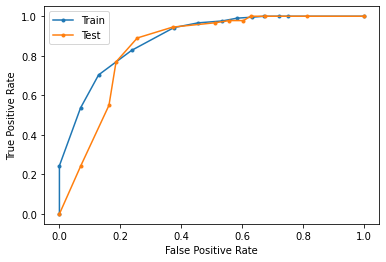

In [91]:
lr_probs = grid_knn.predict_proba(X_train_sc)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
knn_tr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('KNN Train: ROC-AUC = %.3f' % (knn_tr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Train')

lr_probs = grid_knn.predict_proba(X_test_sc)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
knn_tt_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('KNN Test: ROC-AUC = %.3f' % (knn_tt_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Test')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### Boosting

In [92]:
grad_boost = GradientBoostingClassifier(random_state = 1)
grad_boost.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [93]:
print("Train Accuracy is: {}".format(round(accuracy_score(y_train, grad_boost.predict(X_train))*100)),'%')
print("Test Accuracy is: {}".format(round(accuracy_score(y_test, grad_boost.predict(X_test))*100)),'%')

print("Train ROC-AUC score is: {}".format(round(roc_auc_score(y_train, grad_boost.predict_proba(X_train)[:,1])*100)),'%')
print("Test ROC-AUC score is: {}".format(round(roc_auc_score(y_test, grad_boost.predict_proba(X_test)[:,1])*100)),'%')



print("Confusion matrix for train set: ","\n",confusion_matrix(y_train, grad_boost.predict(X_train)))
print("Confusion matrix for test set: ","\n",confusion_matrix(y_test, grad_boost.predict(X_test)))

Train Accuracy is: 97 %
Test Accuracy is: 82 %
Train ROC-AUC score is: 100 %
Test ROC-AUC score is: 87 %
Confusion matrix for train set:  
 [[ 92   9]
 [  1 208]]
Confusion matrix for test set:  
 [[26 17]
 [ 7 84]]


**Interpretations :**
- The Train and Test accuracy after applying boosting technique were found to be 97% & 82% . 
- The ROC-AUC score for train & test set were found to be 100% & 87%. This was a classic case of overfit model.

In [94]:
print('Classification Report Train set')
print(classification_report(y_train, grad_boost.predict(X_train)))

Classification Report Train set
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       101
           1       0.96      1.00      0.98       209

    accuracy                           0.97       310
   macro avg       0.97      0.95      0.96       310
weighted avg       0.97      0.97      0.97       310



In [95]:
print('Classification report Test set')
print(classification_report(y_test, grad_boost.predict(X_test)))

Classification report Test set
              precision    recall  f1-score   support

           0       0.79      0.60      0.68        43
           1       0.83      0.92      0.87        91

    accuracy                           0.82       134
   macro avg       0.81      0.76      0.78       134
weighted avg       0.82      0.82      0.81       134



**Interpretations :**
- We compared both classification reports of train & test data and got to understand that f1 score for class '0'(Private Transport) was 95% & 68% . And for class '1'(Public Transport) , f1 score values were 98% & 87% .
- As we observed the model accuracy as well as ROC-AUC curve, the model was found to be overfitted.
- Thus, the model must be hyper-tuned using Grid Search CV and build a new better model.

#### Boosting Technqiue Using Grid Search CV

In [96]:
param_grad_boost = {'learning_rate':[0.01,0.02,0.05,0.075], 'max_depth':[3,4,5,6,7,8],
            'min_samples_split':[9,10,11,12], 'n_estimators':[50,100] , 'random_state':[1]}  

In [97]:
grid_boost = GridSearchCV(GradientBoostingClassifier(), param_grid=param_grad_boost, refit=True, verbose=True, n_jobs=-1)
grid_boost.fit(X_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.05, 0.075],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_split': [9, 10, 11, 12],
                         'n_estimators': [50, 100], 'random_state': [1]},
             verbose=True)

In [98]:
grid_boost.best_params_

{'learning_rate': 0.01,
 'max_depth': 4,
 'min_samples_split': 10,
 'n_estimators': 100,
 'random_state': 1}

In [99]:
print("Train Accuracy is: {}".format(round(accuracy_score(y_train, grid_boost.predict(X_train))*100)),'%')
print("Test Accuracy is: {}".format(round(accuracy_score(y_test, grid_boost.predict(X_test))*100)),'%')


print("Train ROC-AUC score is: {}".format(round(roc_auc_score(y_train, grid_boost.predict_proba(X_train)[:,1])*100)),'%')
print("Test ROC-AUC score is: {}".format(round(roc_auc_score(y_test, g  rid_boost.predict_proba(X_test)[:,1])*100)),'%')



print("Confusion matrix for train set: ","\n",confusion_matrix(y_train, grid_boost.predict(X_train)))
print("Confusion matrix for test set: ","\n",confusion_matrix(y_test, grid_boost.predict(X_test)))

Train Accuracy is: 87 %
Test Accuracy is: 80 %
Train ROC-AUC score is: 96 %
Test ROC-AUC score is: 84 %
Confusion matrix for train set:  
 [[ 61  40]
 [  0 209]]
Confusion matrix for test set:  
 [[19 24]
 [ 3 88]]


In [100]:
print('Classification Report Train set')
print(classification_report(y_train, grid_boost.predict(X_train)))

Classification Report Train set
              precision    recall  f1-score   support

           0       1.00      0.60      0.75       101
           1       0.84      1.00      0.91       209

    accuracy                           0.87       310
   macro avg       0.92      0.80      0.83       310
weighted avg       0.89      0.87      0.86       310



In [101]:
boost_tr_metrics = classification_report(y_train, grid_boost.predict(X_train), output_dict=True)
boost_tr = pd.DataFrame(boost_tr_metrics).T
boost_tr_f1 = round(boost_tr.loc["1"][2],2)
boost_tr_recall = round(boost_tr.loc["1"][1],2)
boost_tr_precision = round(boost_tr.loc["1"][0],2)
boost_tr_acc = round(boost_tr.loc["accuracy"][0],2)

In [102]:
print('Classification Report Test set')
print(classification_report(y_test, grid_boost.predict(X_test)))

Classification Report Test set
              precision    recall  f1-score   support

           0       0.86      0.44      0.58        43
           1       0.79      0.97      0.87        91

    accuracy                           0.80       134
   macro avg       0.82      0.70      0.73       134
weighted avg       0.81      0.80      0.78       134



In [103]:
boost_tt_metrics = classification_report(y_test, grid_boost.predict(X_test), output_dict=True)
boost_tt = pd.DataFrame(boost_tt_metrics).T
boost_tt_f1 = round(boost_tt.loc["1"][2],2)
boost_tt_recall = round(boost_tt.loc["1"][1],2)
boost_tt_precision = round(boost_tt.loc["1"][0],2)
boost_tt_acc = round(boost_tt.loc["accuracy"][0],2)

Boosting Classifier Train: ROC-AUC = 0.957
Boosting Classifier Test: ROC-AUC = 0.840


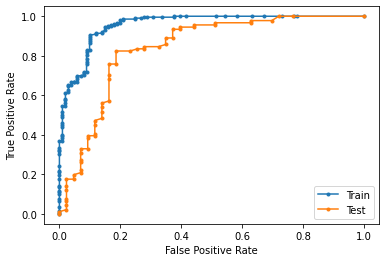

In [104]:
lr_probs =grid_boost.predict_proba(X_train)
# keeping probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
boost_tr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('Boosting Classifier Train: ROC-AUC = %.3f' % (boost_tr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Train')

lr_probs =grid_boost.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
boost_tt_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Boosting Classifier Test: ROC-AUC = %.3f' % (boost_tt_auc))

# calculate ROC curves

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Test')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### Bagging

In [105]:
bagging = BaggingClassifier(random_state = 1)
bagging.fit(X_train, y_train)

BaggingClassifier(random_state=1)

In [106]:
print("Train Accuracy is: {}".format(round(accuracy_score(y_train, bagging.predict(X_train))*100)),'%')
print("Test Accuracy is: {}".format(round(accuracy_score(y_test, bagging.predict(X_test))*100)),'%')


print("Train ROC-AUC score is: {}".format(round(roc_auc_score(y_train, bagging.predict_proba(X_train)[:,1])*100)),'%')
print("Test ROC-AUC score is: {}".format(round(roc_auc_score(y_test, bagging.predict_proba(X_test)[:,1])*100)),'%')



print("Confusion Matrix for train set: ","\n",confusion_matrix(y_train, bagging.predict(X_train)))
print("Confusion Matrix for test set: ","\n",confusion_matrix(y_test, bagging.predict(X_test)))

Train Accuracy is: 100 %
Test Accuracy is: 80 %
Train ROC-AUC score is: 100 %
Test ROC-AUC score is: 84 %
Confusion Matrix for train set:  
 [[101   0]
 [  0 209]]
Confusion Matrix for test set:  
 [[27 16]
 [11 80]]


In [107]:
print('Classification Report Train set')
print(classification_report(y_train, bagging.predict(X_train)))

Classification Report Train set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00       209

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310



In [108]:
print('Classification report Test set')
print(classification_report(y_test, bagging.predict(X_test)))

Classification report Test set
              precision    recall  f1-score   support

           0       0.71      0.63      0.67        43
           1       0.83      0.88      0.86        91

    accuracy                           0.80       134
   macro avg       0.77      0.75      0.76       134
weighted avg       0.79      0.80      0.79       134



In [109]:
bagging_param= {'base_estimator':[LogisticRegression(), RandomForestClassifier()], 'n_estimators':[20,30,40], 'max_samples':[0.5,0.6,0.7], 'max_features':[0.4,0.5,0.6]
    , 'random_state':[1]}

In [110]:
grid_bagging = GridSearchCV(BaggingClassifier(), param_grid=bagging_param, refit=True, verbose=True, n_jobs=-1)
grid_bagging.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'base_estimator': [LogisticRegression(),
                                            RandomForestClassifier()],
                         'max_features': [0.4, 0.5, 0.6],
                         'max_samples': [0.5, 0.6, 0.7],
                         'n_estimators': [20, 30, 40], 'random_state': [1]},
             verbose=True)

In [111]:
grid_bagging.best_params_

{'base_estimator': RandomForestClassifier(),
 'max_features': 0.5,
 'max_samples': 0.6,
 'n_estimators': 20,
 'random_state': 1}

In [112]:
print("Train Accuracy is: {}".format(round(accuracy_score(y_train, grid_bagging.predict(X_train))*100)),'%')
print("Test Accuracy is: {}".format(round(accuracy_score(y_test, grid_bagging.predict(X_test))*100)),'%')


print("Train ROC-AUC score is: {}".format(round(roc_auc_score(y_train, grid_bagging.predict_proba(X_train)[:,1])*100)),'%')
print("Test ROC-AUC score is: {}".format(round(roc_auc_score(y_test, grid_bagging.predict_proba(X_test)[:,1])*100)),'%')



print("Confusion matrix for train set: ","\n",confusion_matrix(y_train, grid_bagging.predict(X_train)))
print("Confusion matrix for test set: ","\n",confusion_matrix(y_test, grid_bagging.predict(X_test)))

Train Accuracy is: 91 %
Test Accuracy is: 78 %
Train ROC-AUC score is: 99 %
Test ROC-AUC score is: 84 %
Confusion matrix for train set:  
 [[ 76  25]
 [  4 205]]
Confusion matrix for test set:  
 [[18 25]
 [ 4 87]]


In [113]:
print('Classification Report Train set')
print(classification_report(y_train, grid_bagging.predict(X_train)))

Classification Report Train set
              precision    recall  f1-score   support

           0       0.95      0.75      0.84       101
           1       0.89      0.98      0.93       209

    accuracy                           0.91       310
   macro avg       0.92      0.87      0.89       310
weighted avg       0.91      0.91      0.90       310



In [114]:
bagging_tr_metrics = classification_report(y_train, grid_bagging.predict(X_train), output_dict=True)
bagging_tr = pd.DataFrame(bagging_tr_metrics).T
bagging_tr_f1 = round(bagging_tr.loc["1"][2],2)
bagging_tr_recall = round(bagging_tr.loc["1"][1],2)
bagging_tr_precision = round(bagging_tr.loc["1"][0],2)
bagging_tr_acc = round(bagging_tr.loc["accuracy"][0],2)

In [115]:
print('Classification Report Test set')
print(classification_report(y_test, grid_bagging.predict(X_test)))

Classification Report Test set
              precision    recall  f1-score   support

           0       0.82      0.42      0.55        43
           1       0.78      0.96      0.86        91

    accuracy                           0.78       134
   macro avg       0.80      0.69      0.71       134
weighted avg       0.79      0.78      0.76       134



In [116]:
bagging_tt_metrics = classification_report(y_test, grid_bagging.predict(X_test), output_dict=True)
bagging_tt = pd.DataFrame(bagging_tt_metrics).T
bagging_tt_f1 = round(bagging_tt.loc["1"][2],2)
bagging_tt_recall = round(bagging_tt.loc["1"][1],2)
bagging_tt_precision = round(bagging_tt.loc["1"][0],2)
bagging_tt_acc = round(bagging_tt.loc  ["accuracy"][0],2)

Bagging Classifier Train: ROC-AUC = 0.990
Bagging classifier test: ROC-AUC = 0.845


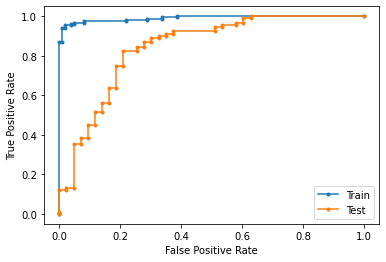

In [117]:
#Train
lr_probs =grid_bagging.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
bagging_tr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('Bagging Classifier Train: ROC-AUC = %.3f' % (bagging_tr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Train')

#test
lr_probs = grid_bagging.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
bagging_tt_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Bagging classifier test: ROC-AUC = %.3f' % (bagging_tt_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Test')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

## Comparing Models For Finding Best Model Among All

In [121]:
index = ['Accuracy', 'Precision', 'Recall' , 'F1 Score', 'AUC']

comaprison = pd.DataFrame({'Logistic Regression Test':[log_reg_acc, log_reg_precision, log_reg_recall , log_reg_f1, log_reg_auc],
                     'KNN Train':[knn_tr_acc, knn_tr_precision, knn_tr_recall, knn_tr_f1, knn_tr_auc], 
                     'KNN Test':[knn_tt_acc, knn_tt_precision, knn_tt_recall, knn_tt_f1, knn_tt_auc], 
                     'Boosting Train':[boost_tr_acc, boost_tr_precision , boost_tr_recall, boost_tr_f1, boost_tr_auc], 
                     'Boosting Test':[boost_tt_acc, boost_tt_precision, boost_tt_recall , boost_tt_f1, boost_tt_auc], 
                     'Bagging Train':[bagging_tr_acc, bagging_tr_precision, bagging_tr_recall, bagging_tr_f1, bagging_tr_auc], 
                     'Bagging Test':[bagging_tt_acc, bagging_tt_precision , bagging_tt_recall, bagging_tt_f1, bagging_tt_auc]}, index=index)

comaprison.round(2)*100

,Logistic Regression Test,KNN Train,KNN Test,Boosting Train,Boosting Test,Bagging Train,Bagging Test
Accuracy,82.0,83.0,81.0,87.0,80.0,91.0,78.0
Precision,82.0,81.0,80.0,84.0,79.0,89.0,78.0
Recall,95.0,97.0,97.0,100.0,97.0,98.0,96.0
F1 Score,88.0,88.0,88.0,91.0,87.0,93.0,86.0
AUC,76.0,89.0,84.0,96.0,84.0,99.0,84.0
